In [ ]:
import time
import numpy as np
from load_supermock_lite import load_single_skypatch, combine_multiple_skypatches
from plot_utils import calculate_and_plot_hmf, calculate_and_plot_dN_dz, basemap_plot

import plot_utils
import importlib
importlib.reload(plot_utils)

<module 'plot_utils' from '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/HACCnPaint/Cores/Lite/lite_mocks/plot_utils.py'>

### SuperMockLite:
* This is an intermediate dataproduct
* In this dataset, the full sky is divided to 192 patches. 
* Each skypatch is in separate files and can be loaded individually or together (loaders provided). 
* This is a core catalog in the sky. There are no stellar masses, star formation histories, SEDs, photometries.
* Useful if you want to apply simple HODs, paint. 
* Full catalog (with SFHs, SEDs etc is roughly 200x bigger in storage is being generated
* This catalog consists of over 6.9 billion cores: consisting of centrals, satellites and merged cores. 

### Loading single skypatch. The skypatch ID can be: 1-191

In [ ]:
time1 = time.time()
target_skypatch_id = 130
output_file = f"finished_mocks/supermock_lite_lightcone_skypatch_{target_skypatch_id}.h5"
# Load matches_for_lc from the HDF5 file
core_catalog = load_single_skypatch(output_file)
print('Available match keys: ', core_catalog.keys())
print('Matches: ', core_catalog['x'].shape, 'Skypatch: ', target_skypatch_id)
time2 = time.time()
print(f'Time taken %.2f minutes'%((time2 - time1)/60))

Available match keys:  dict_keys(['central', 'core_state', 'core_tag', 'dec', 'merged', 'ra', 'redshift', 'tree_node_mass', 'x', 'y', 'z'])
Matches:  (36183807,) Skypatch:  130
Time taken 0.26 minutes


### Loading multiple skypatches. You may choose to load all or part, based on file patterns. 

In [ ]:
# Define the glob pattern to match your HDF5 files
# Adjust the path and pattern as needed
file_pattern = "finished_mocks/supermock_lite_lightcone_skypatch_*.h5"


time1 = time.time()

# Call the function to combine skypatch catalogs
try:
    core_catalog = combine_multiple_skypatches(file_pattern)
except FileNotFoundError as fnf_error:
    print(fnf_error)
except ValueError as val_error:
    print(val_error)

time2 = time.time()
print(f'Time taken %.2f minutes'%((time2 - time1)/60))

Found 191 files matching pattern 'finished_mocks/supermock_lite_lightcone_skypatch_*.h5'.
Loading file 1/191: supermock_lite_lightcone_skypatch_1.h5
Expected 'tree_node_mass' ndim set to 1 based on 'supermock_lite_lightcone_skypatch_1.h5'.
Loading file 2/191: supermock_lite_lightcone_skypatch_10.h5
Loading file 3/191: supermock_lite_lightcone_skypatch_100.h5
Loading file 4/191: supermock_lite_lightcone_skypatch_101.h5
Loading file 5/191: supermock_lite_lightcone_skypatch_102.h5
Loading file 6/191: supermock_lite_lightcone_skypatch_103.h5
Loading file 7/191: supermock_lite_lightcone_skypatch_104.h5
Loading file 8/191: supermock_lite_lightcone_skypatch_105.h5
Loading file 9/191: supermock_lite_lightcone_skypatch_106.h5
Loading file 10/191: supermock_lite_lightcone_skypatch_107.h5
Loading file 11/191: supermock_lite_lightcone_skypatch_108.h5
Loading file 12/191: supermock_lite_lightcone_skypatch_109.h5
Loading file 13/191: supermock_lite_lightcone_skypatch_11.h5
Loading file 14/191: super

### Central, satellite and merged cores
#### Use the selection tags below to choose the type of core/galaxies

In [ ]:
central_cond = (core_catalog['central'] == 1)
satellite_cond = (core_catalog['central'] == 0) & (core_catalog['merged'] == 0)
merged_cond = (core_catalog['central'] == 0) & (core_catalog['merged'] == 1)

In [ ]:
central_halo_mass = core_catalog['tree_node_mass'][central_cond]
satellite_halo_mass = core_catalog['tree_node_mass'][satellite_cond]

## Remove -1 
central_halo_mass = central_halo_mass[central_halo_mass != -1]
satellite_halo_mass = satellite_halo_mass[satellite_halo_mass != -1]

redshift_central = core_catalog['redshift'][central_cond]
redshift_satellite = core_catalog['redshift'][satellite_cond]

redshift_central = redshift_central[redshift_central != -1]
redshift_satellite = redshift_satellite[redshift_satellite != -1]

In [ ]:
ra_central = core_catalog['ra'][central_cond]
ra_satellite = core_catalog['ra'][satellite_cond]

ra_central = ra_central[ra_central != -1]
ra_satellite = ra_satellite[ra_satellite != -1]

dec_central = core_catalog['dec'][central_cond]
dec_satellite = core_catalog['dec'][satellite_cond]

dec_central = dec_central[dec_central != -1]
dec_satellite = dec_satellite[dec_satellite != -1]

### Sample plotting routines: Halo mass function --- all routines are trials only.

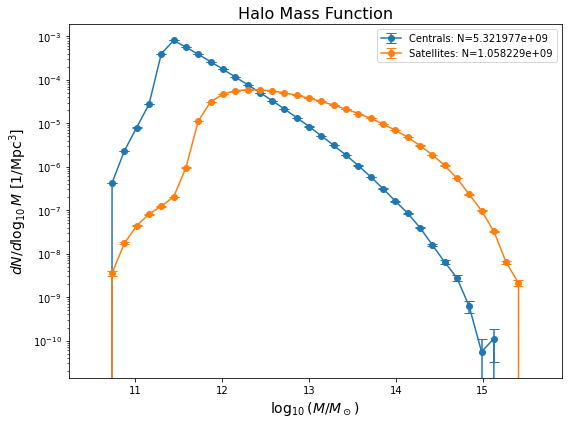

In [ ]:
num_bins = 40 #np.linspace( 10.5, 16, 100)

n_cen = int(central_halo_mass.shape[0]*0.01)
n_sat = int(satellite_halo_mass.shape[0]*0.01)

random_cen_indices = np.random.randint(low=0, high=central_halo_mass.shape[0], size=n_cen)
random_sat_indices = np.random.randint(low=0, high=satellite_halo_mass.shape[0], size=n_sat)

mass_arrays = [central_halo_mass[random_cen_indices], satellite_halo_mass[random_sat_indices]]
labels = ['Centrals: N=%e'%central_halo_mass.shape[0], 'Satellites: N=%e'%satellite_halo_mass.shape[0]]

# Define the survey or simulation volume in Mpc^3
L = 5025  # Mpc
volume = L**3  # Mpc^3

# Call the function to calculate and plot the HMF
calculate_and_plot_hmf(mass_arrays, labels, volume, num_bins=num_bins)

### Sample plotting routines: Redshift distribution

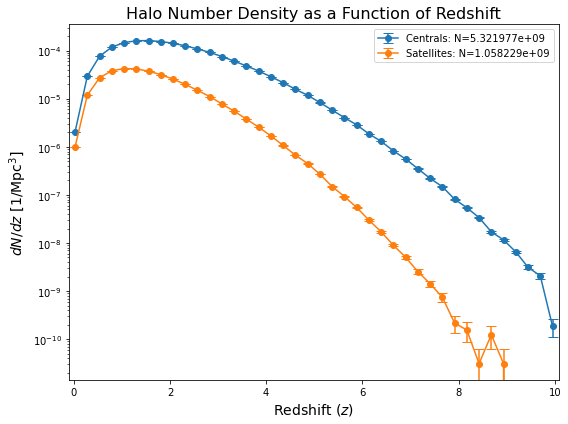

In [ ]:
num_bins = 40
mass_arrays = [redshift_central[random_cen_indices], redshift_satellite[random_sat_indices]]
labels = ['Centrals: N=%e'%central_halo_mass.shape[0], 'Satellites: N=%e'%satellite_halo_mass.shape[0]]

# Define the survey or simulation volume in Mpc^3
L = 5025  # Mpc
volume = L**3  # Mpc^3

# Call the function to calculate and plot the HMF
calculate_and_plot_dN_dz(mass_arrays, labels, volume, num_bins=num_bins)

### Sample plotting routines: Sky coverage

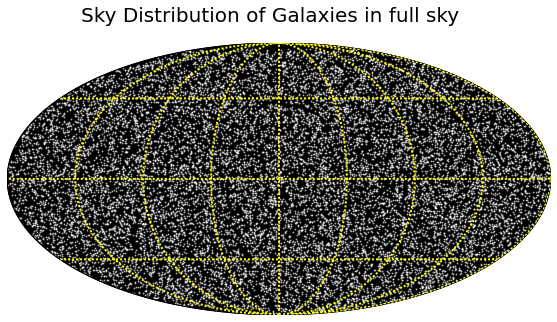

In [ ]:
basemap_plot(ra_central, dec_central, 'w')

In [ ]:
# basemap_plot(ra_satellite, dec_satellite, 'w')